In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/06_Jun.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,56.000000,1,5,1,2705.0,2754.0,2786.0,2721.0,3006.0,2313.0,2709.083333,2634.0
1,25.916667,56.416667,1,5,1,2675.0,2746.0,2768.0,2686.0,2974.0,2307.0,2692.750000,2572.0
2,25.833333,56.833333,1,5,1,2653.0,2720.0,2731.0,2673.0,2969.0,2340.0,2678.083333,2555.0
3,25.750000,57.250000,1,5,1,2640.0,2698.0,2785.0,2644.0,2950.0,2361.0,2657.166667,2534.0
4,25.666667,57.666667,2,5,1,2634.0,2705.0,2754.0,2620.0,2918.0,2299.0,2637.583333,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,35.122450,45.925632,23,1,0,3617.0,3511.0,3446.0,3798.0,3313.0,3766.0,3555.500000,3645.0
8636,35.122450,45.925632,24,1,0,3632.0,3492.0,3457.0,3695.0,3410.0,3745.0,3576.166667,3705.0
8637,35.122450,45.925632,24,1,0,3622.0,3548.0,3436.0,3696.0,3484.0,3769.0,3601.000000,3734.0
8638,35.000000,45.925632,24,1,0,3648.0,3591.0,3467.0,3675.0,3565.0,3824.0,3626.333333,3771.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,-0.085638,-1.752976,-0.637356
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,-0.155045,-1.766669,-0.673295
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,-0.165889,-1.691357,-0.705566
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,-0.207100,-1.643431,-0.751589
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,-0.276507,-1.784926,-0.794679


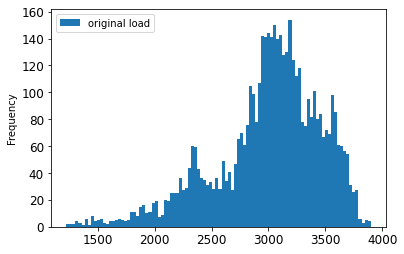

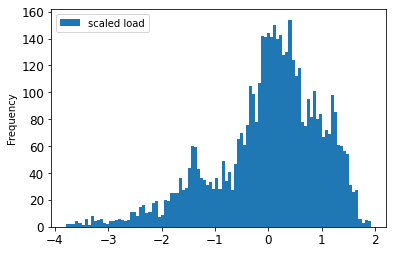

In [8]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

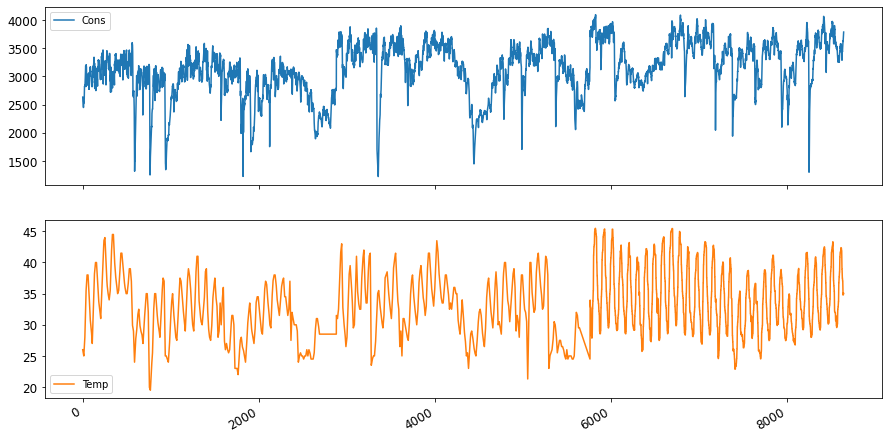

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,-0.085638,-1.752976,-0.637356,-0.909320
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,-0.155045,-1.766669,-0.673295,-0.945593
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,-0.165889,-1.691357,-0.705566,-0.990400
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,-0.207100,-1.643431,-0.751589,-1.022406
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,-0.276507,-1.784926,-0.794679,-1.028807
5,-1.028807,-1.419165,0.109643,-1.516238,0.480035,0.623519,-0.909366,-0.690586,-0.540537,-0.880301,-0.356758,-1.686792,-0.836851,-1.084283
6,-1.084283,-1.436782,0.132399,-1.516238,0.480035,0.623519,-0.945617,-0.737466,-0.595909,-0.880301,-0.306872,-1.641149,-0.879024,-1.146160
7,-1.146160,-1.454399,0.155155,-1.516238,0.480035,0.623519,-0.990398,-0.765168,-0.642762,-0.912260,-0.463038,-1.632020,-0.922480,-1.171764
8,-1.171764,-1.472016,0.177911,-1.371801,0.480035,0.623519,-1.022385,-0.777954,-0.627854,-1.046488,-0.432672,-1.689074,-0.969420,-1.146160
9,-1.146160,-1.489632,0.200666,-1.371801,0.480035,0.623519,-1.028782,-0.910072,-0.691745,-1.574877,-0.465206,-1.584094,-1.008659,-1.071481


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.518854,1.628531,-1.642545,1.372493,-0.020106,0.623519,-0.934955,-1.410840,-1.149626,-0.094109,-1.274230,-1.773515,-1.107674,-0.497517
4792,-0.497517,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.755830,-1.278722,-1.339167,-0.330606,-1.261216,-1.768951,-1.035430,-0.499651
4793,-0.499651,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.649209,-1.165783,-1.552135,-0.351912,-1.246034,-1.784926,-0.945034,-0.424972
4794,-0.424972,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.615090,-1.040058,-1.618155,-0.275211,-1.211330,-1.782644,-0.842536,-0.296950
4795,-0.296950,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.519130,-0.935643,-1.411576,-0.168680,-1.200485,-1.768951,-0.746822,-0.183865
4796,-0.183865,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.497806,-0.756645,-1.279536,0.069947,-1.172289,-1.746129,-0.652758,-0.111319
4797,-0.111319,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.499938,-0.650098,-1.166663,0.202044,-1.083361,-1.730154,-0.562179,0.089248
4798,0.089248,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.425303,-0.616003,-1.041012,0.295790,-0.992265,-1.600069,-0.465182,0.219403
4799,0.219403,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.297357,-0.520111,-0.936658,0.389537,-0.944548,-1.549861,-0.365984,0.289815
4800,0.289815,1.628531,-1.642545,-1.660674,0.480035,0.623519,-0.184338,-0.498802,-0.757765,0.381015,-0.933703,-1.536168,-0.276138,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.518854,1.628531,-1.642545,1.372493,-0.020106,0.623519,-0.934955,-1.410840,-1.149626,-0.094109,-1.274230,-1.773515,-1.107674,-0.497517
4792,-0.497517,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.755830,-1.278722,-1.339167,-0.330606,-1.261216,-1.768951,-1.035430,-0.499651
4793,-0.499651,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.649209,-1.165783,-1.552135,-0.351912,-1.246034,-1.784926,-0.945034,-0.424972
4794,-0.424972,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.615090,-1.040058,-1.618155,-0.275211,-1.211330,-1.782644,-0.842536,-0.296950
4795,-0.296950,1.628531,-1.642545,1.516930,-0.020106,0.623519,-0.519130,-0.935643,-1.411576,-0.168680,-1.200485,-1.768951,-0.746822,-0.183865
4796,-0.183865,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.497806,-0.756645,-1.279536,0.069947,-1.172289,-1.746129,-0.652758,-0.111319
4797,-0.111319,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.499938,-0.650098,-1.166663,0.202044,-1.083361,-1.730154,-0.562179,0.089248
4798,0.089248,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.425303,-0.616003,-1.041012,0.295790,-0.992265,-1.600069,-0.465182,0.219403
4799,0.219403,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.297357,-0.520111,-0.936658,0.389537,-0.944548,-1.549861,-0.365984,0.289815
4800,0.289815,1.628531,-1.642545,-1.660674,0.480035,0.623519,-0.184338,-0.498802,-0.757765,0.381015,-0.933703,-1.536168,-0.276138,0.289815


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-0.909320
1,-0.945593
2,-0.990400
3,-1.022406
4,-1.028807
...,...
4796,-0.111319
4797,0.089248
4798,0.219403
4799,0.289815


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,-0.085638,-1.752976,-0.637356
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,-0.155045,-1.766669,-0.673295
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,-0.165889,-1.691357,-0.705566
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,-0.207100,-1.643431,-0.751589
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,-0.276507,-1.784926,-0.794679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,-0.183865,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.497806,-0.756645,-1.279536,0.069947,-1.172289,-1.746129,-0.652758
4797,-0.111319,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.499938,-0.650098,-1.166663,0.202044,-1.083361,-1.730154,-0.562179
4798,0.089248,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.425303,-0.616003,-1.041012,0.295790,-0.992265,-1.600069,-0.465182
4799,0.219403,1.628531,-1.642545,1.661366,-0.020106,0.623519,-0.297357,-0.520111,-0.936658,0.389537,-0.944548,-1.549861,-0.365984


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4801, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,3121.0,39.750000,26.916667,1.0,5.0,1.0,2946.0,2764.0,2694.0,3197.0,2598.0,2380.0,2908.833333
4802,3104.0,39.500000,27.833333,1.0,5.0,1.0,3040.0,2799.0,2710.0,3192.0,2582.0,2386.0,2941.666667
4803,3094.0,39.250000,28.750000,1.0,5.0,1.0,3101.0,2859.0,2755.0,3189.0,2564.0,2400.0,2969.916667
4804,3073.0,39.000000,29.666667,2.0,5.0,1.0,3134.0,2912.0,2765.0,3147.0,2559.0,2405.0,2995.583333
4805,3047.0,38.750000,30.583333,2.0,5.0,1.0,3121.0,2946.0,2764.0,3136.0,2546.0,2389.0,3019.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,3052.0,24.626050,81.000000,24.0,7.0,0.0,2918.0,2997.0,2871.0,2541.0,2926.0,3272.0,2964.333333
5757,3097.0,24.584034,81.000000,24.0,7.0,0.0,2908.0,3033.0,2859.0,2602.0,2987.0,3333.0,2984.166667
5758,3150.0,24.542017,81.000000,24.0,7.0,0.0,2946.0,3058.0,2874.0,2673.0,3094.0,3383.0,3007.166667
5759,3156.0,24.500000,81.000000,24.0,7.0,0.0,2980.0,3010.0,2937.0,2650.0,3133.0,3372.0,3025.416667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.101272,1.748404,-1.614885,-1.661325,0.202907,0.656278,-0.556334,-1.027994,-1.204063,0.037882,-1.774695,-1.770389,-0.685153
4802,-0.145551,1.699094,-1.573175,-1.661325,0.202907,0.656278,-0.311718,-0.936984,-1.162553,0.024339,-1.821793,-1.756258,-0.595403
4803,-0.171597,1.649783,-1.531464,-1.661325,0.202907,0.656278,-0.152977,-0.780966,-1.045806,0.016214,-1.874777,-1.723286,-0.518182
4804,-0.226295,1.600472,-1.489753,-1.516862,0.202907,0.656278,-0.067101,-0.643150,-1.019863,-0.097541,-1.889495,-1.711511,-0.448022
4805,-0.294016,1.551161,-1.448042,-1.516862,0.202907,0.656278,-0.100931,-0.554739,-1.022457,-0.127334,-1.927762,-1.749193,-0.383557
4806,-0.312248,1.501850,-1.406332,-1.516862,0.202907,0.656278,-0.145170,-0.310311,-0.931654,-0.130042,-1.954254,-1.720931,-0.328659
4807,-0.419039,1.452540,-1.364621,-1.516862,0.202907,0.656278,-0.171193,-0.151692,-0.775992,-0.189628,-1.980746,-1.770389,-0.296768
4808,-0.434666,1.403229,-1.322910,-1.372399,0.202907,0.656278,-0.225842,-0.065882,-0.638490,-0.246506,-2.045505,-1.817491,-0.278317
4809,-0.426852,1.353918,-1.281200,-1.372399,0.202907,0.656278,-0.293502,-0.099686,-0.550282,-0.214004,-2.080828,-1.801005,-0.266928
4810,-0.424248,1.304607,-1.239489,-1.372399,0.202907,0.656278,-0.311718,-0.143892,-0.306411,-0.192337,-2.039618,-1.812781,-0.276723


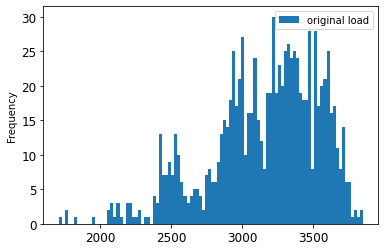

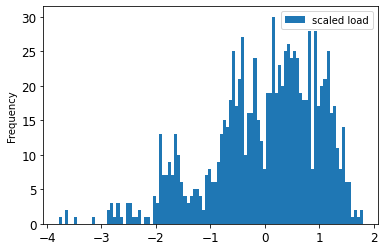

In [19]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.101272,1.748404,-1.614885,-1.661325,0.202907,0.656278,-0.556334,-1.027994,-1.204063,0.037882,-1.774695,-1.770389,-0.685153,-0.145551
4802,-0.145551,1.699094,-1.573175,-1.661325,0.202907,0.656278,-0.311718,-0.936984,-1.162553,0.024339,-1.821793,-1.756258,-0.595403,-0.171597
4803,-0.171597,1.649783,-1.531464,-1.661325,0.202907,0.656278,-0.152977,-0.780966,-1.045806,0.016214,-1.874777,-1.723286,-0.518182,-0.226295
4804,-0.226295,1.600472,-1.489753,-1.516862,0.202907,0.656278,-0.067101,-0.643150,-1.019863,-0.097541,-1.889495,-1.711511,-0.448022,-0.294016
4805,-0.294016,1.551161,-1.448042,-1.516862,0.202907,0.656278,-0.100931,-0.554739,-1.022457,-0.127334,-1.927762,-1.749193,-0.383557,-0.312248
4806,-0.312248,1.501850,-1.406332,-1.516862,0.202907,0.656278,-0.145170,-0.310311,-0.931654,-0.130042,-1.954254,-1.720931,-0.328659,-0.419039
4807,-0.419039,1.452540,-1.364621,-1.516862,0.202907,0.656278,-0.171193,-0.151692,-0.775992,-0.189628,-1.980746,-1.770389,-0.296768,-0.434666
4808,-0.434666,1.403229,-1.322910,-1.372399,0.202907,0.656278,-0.225842,-0.065882,-0.638490,-0.246506,-2.045505,-1.817491,-0.278317,-0.426852
4809,-0.426852,1.353918,-1.281200,-1.372399,0.202907,0.656278,-0.293502,-0.099686,-0.550282,-0.214004,-2.080828,-1.801005,-0.266928,-0.424248
4810,-0.424248,1.304607,-1.239489,-1.372399,0.202907,0.656278,-0.311718,-0.143892,-0.306411,-0.192337,-2.039618,-1.812781,-0.276723,-0.429457


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5751,-0.390387,-1.193254,0.846048,1.372399,1.222754,-1.523745,-0.579755,-0.892779,-0.599575,-1.776780,-0.885732,0.125486,-0.698365,-0.630015
5752,-0.630015,-1.201542,0.846048,1.516862,1.222754,-1.523745,-0.423617,-0.749762,-0.809719,-1.936579,-1.180091,-0.107671,-0.681964,-0.656061
5753,-0.656061,-1.209829,0.846048,1.516862,1.222754,-1.523745,-0.329934,-0.780966,-0.988730,-1.904078,-1.303721,-0.114736,-0.652123,-0.557085
5754,-0.557085,-1.218117,0.846048,1.516862,1.222754,-1.523745,-0.264876,-0.741961,-1.006891,-1.895952,-1.124162,-0.060568,-0.612032,-0.468527
5755,-0.468527,-1.226404,0.846048,1.516862,1.222754,-1.523745,-0.389787,-0.578142,-0.887550,-1.893244,-1.032911,0.031281,-0.574674,-0.280992
5756,-0.280992,-1.234692,0.846048,1.661325,1.222754,-1.523745,-0.629198,-0.422124,-0.744860,-1.738862,-0.809198,0.330382,-0.533444,-0.163783
5757,-0.163783,-1.242980,0.846048,1.661325,1.222754,-1.523745,-0.655221,-0.328513,-0.775992,-1.573647,-0.629640,0.474045,-0.479230,-0.025737
5758,-0.025737,-1.251267,0.846048,1.661325,1.222754,-1.523745,-0.556334,-0.263505,-0.737076,-1.381347,-0.314676,0.591801,-0.416359,-0.010109
5759,-0.010109,-1.259555,0.846048,1.661325,1.222754,-1.523745,-0.467856,-0.388320,-0.573631,-1.443641,-0.199876,0.565895,-0.366473,1.708956
5760,1.708956,0.606850,-1.481463,-1.661325,1.222754,-1.523745,2.077195,2.042963,2.023332,1.654827,1.319016,1.199423,2.099372,1.708956


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4801,-0.145551
4802,-0.171597
4803,-0.226295
4804,-0.294016
4805,-0.312248
...,...
5756,-0.163783
5757,-0.025737
5758,-0.010109
5759,1.708956


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.101272,1.748404,-1.614885,-1.661325,0.202907,0.656278,-0.556334,-1.027994,-1.204063,0.037882,-1.774695,-1.770389,-0.685153
4802,-0.145551,1.699094,-1.573175,-1.661325,0.202907,0.656278,-0.311718,-0.936984,-1.162553,0.024339,-1.821793,-1.756258,-0.595403
4803,-0.171597,1.649783,-1.531464,-1.661325,0.202907,0.656278,-0.152977,-0.780966,-1.045806,0.016214,-1.874777,-1.723286,-0.518182
4804,-0.226295,1.600472,-1.489753,-1.516862,0.202907,0.656278,-0.067101,-0.643150,-1.019863,-0.097541,-1.889495,-1.711511,-0.448022
4805,-0.294016,1.551161,-1.448042,-1.516862,0.202907,0.656278,-0.100931,-0.554739,-1.022457,-0.127334,-1.927762,-1.749193,-0.383557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,-0.280992,-1.234692,0.846048,1.661325,1.222754,-1.523745,-0.629198,-0.422124,-0.744860,-1.738862,-0.809198,0.330382,-0.533444
5757,-0.163783,-1.242980,0.846048,1.661325,1.222754,-1.523745,-0.655221,-0.328513,-0.775992,-1.573647,-0.629640,0.474045,-0.479230
5758,-0.025737,-1.251267,0.846048,1.661325,1.222754,-1.523745,-0.556334,-0.263505,-0.737076,-1.381347,-0.314676,0.591801,-0.416359
5759,-0.010109,-1.259555,0.846048,1.661325,1.222754,-1.523745,-0.467856,-0.388320,-0.573631,-1.443641,-0.199876,0.565895,-0.366473


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(960, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128,input_shape=(1,1)))

#model.add(Dropout(0.1))
#model.add(Dropout(0.6))
#model.add(Dropout(0.6))
model.add(Dropout(0.3))
#model.add(Dropout(0.2))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
401/401 [==============================] - 5s 13ms/step - loss: 0.1882 - val_loss: 0.1252
Epoch 2/300
401/401 [==============================] - 4s 11ms/step - loss: 0.1461 - val_loss: 0.1126
Epoch 3/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0890 - val_loss: 0.1138
Epoch 4/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0688 - val_loss: 0.1011
Epoch 5/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0536 - val_loss: 0.0552
Epoch 6/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0482 - val_loss: 0.0605
Epoch 7/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0427 - val_loss: 0.0500
Epoch 8/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0459 - val_loss: 0.0489
Epoch 9/300
401/401 [==============================] - 4s 11ms/step - loss: 0.0437 - val_loss: 0.0622
Epoch 10/300
401/401 [==============================] - 4s 11ms/step - loss: 0.043

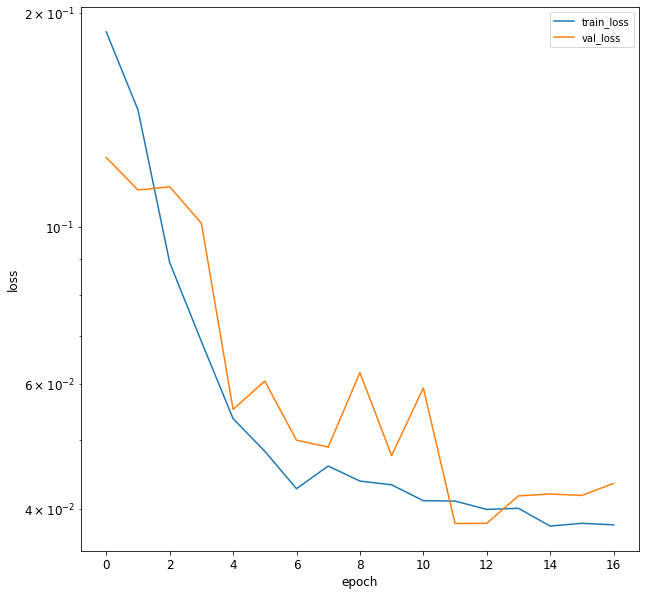

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,3736.0,33.962452,29.848862,1.0,7.0,0.0,3897.0,3968.0,3940.0,3780.0,3662.0,3573.0,3910.500000
5762,3710.0,33.422451,31.537182,1.0,7.0,0.0,3921.0,3972.0,3935.0,3721.0,3624.0,3540.0,3891.750000
5763,3792.0,32.882450,33.225502,1.0,7.0,0.0,3866.0,3961.0,3951.0,3745.0,3617.0,3567.0,3878.500000
5764,3772.0,32.882450,33.225502,2.0,7.0,0.0,3816.0,3958.0,3945.0,3752.0,3603.0,3550.0,3864.083333
5765,3783.0,32.882450,33.225502,2.0,7.0,0.0,3736.0,3897.0,3968.0,3725.0,3606.0,3552.0,3848.666667
5766,3737.0,32.782450,32.575909,2.0,7.0,0.0,3710.0,3921.0,3972.0,3797.0,3682.0,3595.0,3829.083333
5767,3800.0,32.682450,31.926315,2.0,7.0,0.0,3792.0,3866.0,3961.0,3841.0,3666.0,3592.0,3815.666667
5768,3794.0,32.682450,31.926315,3.0,7.0,0.0,3772.0,3816.0,3958.0,3821.0,3667.0,3563.0,3802.000000
5769,3789.0,32.682450,31.926315,3.0,7.0,0.0,3783.0,3736.0,3897.0,3801.0,3688.0,3587.0,3793.000000
5770,3780.0,31.047450,36.170803,3.0,7.0,0.0,3737.0,3710.0,3921.0,3838.0,3732.0,3598.0,3781.250000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 5761 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2879 non-null   float64
 1   Temp    2879 non-null   float64
 2   Hum     2879 non-null   float64
 3   A       2879 non-null   float64
 4   B       2879 non-null   float64
 5   C       2879 non-null   float64
 6   D       2879 non-null   float64
 7   E       2879 non-null   float64
 8   F       2879 non-null   float64
 9   G       2879 non-null   float64
 10  H       2879 non-null   float64
 11  I       2879 non-null   float64
 12  J       2879 non-null   float64
dtypes: float64(13)
memory usage: 314.9 KB


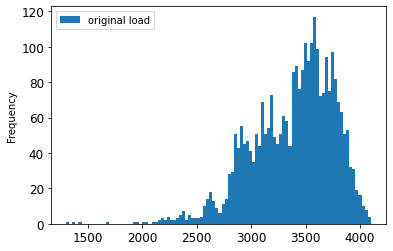

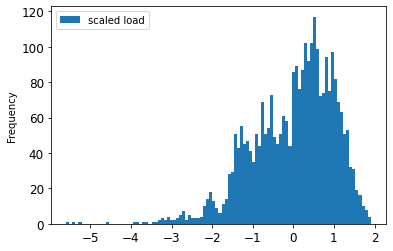

In [33]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,0.936200,-0.104855,-0.710895,-1.662410,1.441924,-1.414951,1.366714,1.553672,1.475297,0.991301,0.669646,0.437426,1.462320,0.866482
5762,0.866482,-0.207638,-0.605263,-1.662410,1.441924,-1.414951,1.431034,1.564377,1.461933,0.837198,0.571093,0.351775,1.409919,1.086360
5763,1.086360,-0.310421,-0.499631,-1.662410,1.441924,-1.414951,1.283634,1.534937,1.504697,0.899884,0.552939,0.421853,1.372889,1.032731
5764,1.032731,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,1.149633,1.526908,1.488660,0.918168,0.516630,0.377730,1.332598,1.062227
5765,1.062227,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,0.935233,1.363649,1.550133,0.847646,0.524411,0.382921,1.289513,0.938881
5766,0.938881,-0.329455,-0.540274,-1.517903,1.441924,-1.414951,0.865553,1.427882,1.560824,1.035704,0.721515,0.494526,1.234783,1.107812
5767,1.107812,-0.348489,-0.580916,-1.517903,1.441924,-1.414951,1.085313,1.280681,1.531424,1.150628,0.680020,0.486740,1.197288,1.091723
5768,1.091723,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.031713,1.146861,1.523406,1.098390,0.682613,0.411471,1.159093,1.078316
5769,1.078316,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.061193,0.932751,1.360369,1.046152,0.737076,0.473763,1.133941,1.054183
5770,1.054183,-0.659692,-0.315354,-1.373396,1.441924,-1.414951,0.937913,0.863165,1.424515,1.142792,0.851190,0.502313,1.101103,1.131945


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8635,0.692189,0.115937,0.294970,1.516749,-1.440923,-1.414951,0.616313,0.330564,0.154971,1.038316,-0.235481,0.938353,0.470195,0.853075
8636,0.853075,0.115937,0.294970,1.661256,-1.440923,-1.414951,0.656513,0.279713,0.184371,0.769289,0.016087,0.883848,0.527952,0.930837
8637,0.930837,0.115937,0.294970,1.661256,-1.440923,-1.414951,0.629713,0.429590,0.128244,0.771901,0.208005,0.946139,0.597355,1.030050
8638,1.030050,0.092630,0.294970,1.661256,-1.440923,-1.414951,0.699393,0.544675,0.211098,0.717050,0.418078,1.088890,0.668154,1.078316
8639,1.078316,0.092630,0.305879,1.661256,-1.440923,-1.414951,0.691353,0.614261,0.328698,0.779736,0.508850,1.052554,0.732898,1.078316


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5761,0.866482
5762,1.086360
5763,1.032731
5764,1.062227
5765,0.938881
...,...
8635,0.853075
8636,0.930837
8637,1.030050
8638,1.078316


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,0.936200,-0.104855,-0.710895,-1.662410,1.441924,-1.414951,1.366714,1.553672,1.475297,0.991301,0.669646,0.437426,1.462320
5762,0.866482,-0.207638,-0.605263,-1.662410,1.441924,-1.414951,1.431034,1.564377,1.461933,0.837198,0.571093,0.351775,1.409919
5763,1.086360,-0.310421,-0.499631,-1.662410,1.441924,-1.414951,1.283634,1.534937,1.504697,0.899884,0.552939,0.421853,1.372889
5764,1.032731,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,1.149633,1.526908,1.488660,0.918168,0.516630,0.377730,1.332598
5765,1.062227,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,0.935233,1.363649,1.550133,0.847646,0.524411,0.382921,1.289513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,0.692189,0.115937,0.294970,1.516749,-1.440923,-1.414951,0.616313,0.330564,0.154971,1.038316,-0.235481,0.938353,0.470195
8636,0.853075,0.115937,0.294970,1.661256,-1.440923,-1.414951,0.656513,0.279713,0.184371,0.769289,0.016087,0.883848,0.527952
8637,0.930837,0.115937,0.294970,1.661256,-1.440923,-1.414951,0.629713,0.429590,0.128244,0.771901,0.208005,0.946139,0.597355
8638,1.030050,0.092630,0.294970,1.661256,-1.440923,-1.414951,0.699393,0.544675,0.211098,0.717050,0.418078,1.088890,0.668154


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2879, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2879,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[1.004858  ],
       [0.90651405],
       [1.1178784 ],
       ...,
       [0.956053  ],
       [1.0571878 ],
       [1.1060765 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5761][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3386.858805
dtype: float64
Cons    372.999296
dtype: float64


In [42]:
load_mean=3386.858805
load_std=372.999296
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2879, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2879, 1)


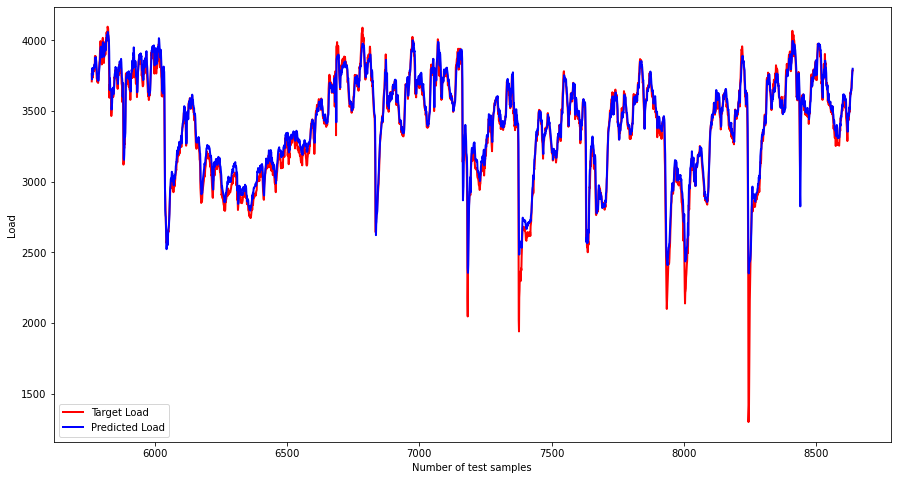

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.6054144391080036


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.972417
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5761  370904.222321
5762  379108.807014
5763  377105.848590
5764  378206.790340
5765  373604.454415
...             ...
8635  370406.734645
8636  373306.616894
8637  377007.405097
8638  378807.193866
8639  378806.712604

[2879 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5761  2664.008183
5762  4500.040724
5763  1008.682008
5764    11.932719
5765  3702.046843
...           ...
8635  2003.160635
8636   479.552329
8637   761.796844
8638    62.104642
8639   107.219848

[2879 rows x 1 columns]
y_t+1    6286.776356
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    79.289194
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[3761.6702]
[3724.988]
[3803.8267]
[3786.5232]
[3797.9053]
[3757.75]
[3806.6409]
[3801.0342]
[3803.0361]
[3801.473]
[3819.2634]
[3832.9216]
[3812.155]
[3875.7852]
[3869.4534]
[3881.6416]
[3869.0596]
[3850.053]
[3816.6108]
[3779.7244]
[3757.0703]
[3745.1094]
[3724.1296]
[3739.9434]
[3747.154]
[3714.4517]
[3738.0312]
[3767.4978]
[3783.1282]
[3811.3452]
[3841.6538]
[3855.5784]
[3898.6895]
[3938.883]
[3955.0942]
[3955.4446]
[3944.5122]
[3946.0352]
[3935.324]
[3879.6921]
[3953.965]
[3939.1604]
[3983.556]
[3987.7893]
[3954.3408]
[3935.8887]
[3913.7886]
[3884.5793]
[3913.1758]
[3944.4878]
[3976.5664]
[3963.3906]
[3928.5564]
[3932.2268]
[3976.254]
[4000.7388]
[3997.0962]
[4038.273]
[4029.1982]
[4032.5361]
[4043.5403]
[4059.8384]
[4038.1287]
[4034.811]
[4014.8887]
[4001.774]
[3918.8823]
[3767.3965]
[3649.1013]
[3731.0845]
[3661.3066]
[3650.828]
[3656.2122]
[3644.3474]
[3642.8523]
[3510.6665]
[3532.2073]
[3557.7192]
[3627.8728]
[3633.7476]
[3658.5195]
[3666.182]
[3619.3953]
[3646.7683]
[3652.255

[3432.1692]
[3468.771]
[3474.809]
[3476.3342]
[3447.5088]
[3439.6428]
[3421.3171]
[3415.3777]
[3411.797]
[3416.0894]
[3426.0212]
[3419.7324]
[3421.6685]
[3454.7124]
[3465.256]
[3475.9526]
[3532.683]
[3614.9385]
[3649.8623]
[3674.4314]
[3699.9788]
[3682.8296]
[3695.0742]
[3670.5198]
[3667.8276]
[3661.0222]
[3684.2136]
[3684.706]
[3678.848]
[3634.6885]
[3635.7314]
[3653.5146]
[3665.911]
[3643.9065]
[3639.4705]
[3682.961]
[3634.08]
[3665.391]
[3731.4497]
[3724.3198]
[3564.7383]
[3655.9517]
[3744.7507]
[3762.0662]
[3761.8784]
[3420.502]
[3864.9983]
[3876.2812]
[3879.101]
[3888.9531]
[3885.0352]
[3892.0547]
[3872.619]
[3899.7036]
[3881.2563]
[3843.9915]
[3803.9478]
[3760.6938]
[3710.8857]
[3677.166]
[3665.3928]
[3733.806]
[3757.127]
[3785.573]
[3758.0732]
[3791.06]
[3776.2988]
[3802.6316]
[3818.373]
[3814.7732]
[3824.6372]
[3817.426]
[3808.6428]
[3809.5803]
[3837.1611]
[3821.2468]
[3845.8027]
[3842.6057]
[3841.7476]
[3851.3193]
[3834.0786]
[3809.9507]
[3825.3655]
[3822.0217]
[3807.3005]
[38

[3463.3423]
[3431.8638]
[3399.9546]
[3437.2559]
[3458.04]
[3513.3196]
[3510.4587]
[3468.8074]
[3469.437]
[3435.8276]
[3429.313]
[3400.3284]
[3411.091]
[3408.2034]
[3267.916]
[2913.7502]
[2533.9917]
[2484.7578]
[2515.147]
[2563.2776]
[2577.5469]
[2565.4988]
[2540.3223]
[2544.3936]
[2571.1636]
[2574.6545]
[2532.7837]
[2582.6494]
[2653.0596]
[2718.5815]
[2745.7742]
[2737.931]
[2730.0315]
[2725.4817]
[2721.5435]
[2726.7036]
[2722.6924]
[2730.628]
[2716.0332]
[2722.0027]
[2722.2268]
[2698.4912]
[2687.146]
[2673.2083]
[2669.5862]
[2665.7617]
[2679.1963]
[2697.1838]
[2685.0654]
[2700.0413]
[2707.8342]
[2711.4773]
[2702.5925]
[2704.8176]
[2712.2642]
[2711.0483]
[2719.3462]
[2715.9785]
[2722.3667]
[2730.406]
[2720.5542]
[2757.1553]
[2769.5305]
[2784.1438]
[2817.1025]
[2873.7366]
[2917.2896]
[2957.33]
[2965.7695]
[3017.2002]
[3046.0586]
[3015.0713]
[3035.267]
[3104.9128]
[3155.2964]
[3162.6187]
[3186.842]
[3192.8296]
[3232.1887]
[3274.4846]
[3297.2769]
[3321.836]
[3352.9285]
[3357.3325]
[3322.42

[2912.6692]
[2878.8657]
[2888.7637]
[2887.4014]
[2883.915]
[2872.8452]
[2865.8354]
[2859.7896]
[2856.8745]
[2863.475]
[2913.8928]
[2899.022]
[2942.6885]
[2963.9536]
[3051.4941]
[3097.5767]
[3157.7986]
[3206.1147]
[3281.042]
[3323.1394]
[3363.6655]
[3382.4934]
[3406.3062]
[3420.993]
[3398.8767]
[3445.151]
[3471.5598]
[3477.0977]
[3449.5962]
[3474.8247]
[3478.1365]
[3487.5557]
[3504.951]
[3516.7734]
[3559.4302]
[3529.9685]
[3516.5916]
[3499.1199]
[3486.4111]
[3526.1035]
[3522.1804]
[3580.0146]
[3649.3313]
[3642.2632]
[3623.429]
[3618.8142]
[3612.5461]
[3577.7424]
[3603.876]
[3612.9072]
[3627.9282]
[3622.6418]
[3614.4248]
[3608.4524]
[3595.6848]
[3528.4417]
[3506.7935]
[3483.2192]
[3482.215]
[3448.17]
[3389.0288]
[3398.132]
[3486.459]
[3520.159]
[3524.2085]
[3497.8494]
[3524.5247]
[3531.1157]
[3554.5984]
[3572.4841]
[3610.786]
[3583.7131]
[3594.2124]
[3620.253]
[3630.322]
[3609.8953]
[3611.8684]
[3653.9236]
[3651.151]
[3655.182]
[3635.786]
[3608.64]
[3566.2883]
[3584.306]
[3572.9124]
[355